![bees](bees.jpg)

# Which plants are better for bees: native or non-native?

## 📖 Background
You work for the local government environment agency and have taken on a project about creating pollinator bee-friendly spaces. You can use both native and non-native plants to create these spaces and therefore need to ensure that you use the correct plants to optimize the environment for these bees.

The team has collected data on native and non-native plants and their effects on pollinator bees. Your task will be to analyze this data and provide recommendations on which plants create an optimized environment for pollinator bees.

## 💾 The Data
You have assembled information on the plants and bees research in a file called `plants_and_bees.csv`. Each row represents a sample that was taken from a patch of land where the plant species were being studied.

| Column     | Description              |
|------------|--------------------------|
| `sample_id` | The ID number of the sample taken. |
| `species_num` | The number of different bee species in the sample. |
| `date` | Date the sample was taken. |
| `season` | Season during sample collection ("early.season" or "late.season"). |
| `site` | Name of collection site. |
| `native_or_non` | Whether the sample was from a native or non-native plant. |
| `sampling` | The sampling method. |
| `plant_species` | The name of the plant species the sample was taken from. None indicates the sample was taken from the air. |
| `time` | The time the sample was taken. |
| `bee_species` | The bee species in the sample. |
| `sex` | The gender of the bee species. |
| `specialized_on` | The plant genus the bee species preferred. |
| `parasitic` | Whether or not the bee is parasitic (0:no, 1:yes). |
| `nesting` | The bees nesting method. |
| `status` | The status of the bee species. |
| `nonnative_bee` | Whether the bee species is native or not (0:no, 1:yes). |

[Source](https://datadryad.org/stash/dataset/doi%253A10.5061%252Fdryad.pzgmsbcj8) (data has been modified)

## 💪 Challenge
Provide your agency with a report that covers the following:
* Which plants are preferred by native vs non-native bee species?
* A visualization of the distribution of bee and plant species across one of the samples.
* Select the top three plant species you would recommend to the agency to support native bees.

## 🧑‍⚖️ Judging criteria

This is a community-based competition. The top 5 most upvoted entries will win.

The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your work.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [57]:
import pandas as pd
data = pd.read_csv("data/plants_and_bees.csv")
data

,sample_id,species_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
0,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
1,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,NaN,0.0,ground,NaN,0.0
2,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
3,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena carlini,f,NaN,0.0,ground,NaN,0.0
4,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena perplexa,m,NaN,0.0,ground,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1246,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1247,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1248,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0


In [58]:
# First Data of dataset
data.head()

,sample_id,species_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
0,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
1,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,NaN,0.0,ground,NaN,0.0
2,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
3,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena carlini,f,NaN,0.0,ground,NaN,0.0
4,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena perplexa,m,NaN,0.0,ground,NaN,0.0


In [59]:
#Describe the latest data of dataset

data.tail()

,sample_id,species_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
1245,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1246,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1247,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1248,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1249,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0


**Let's start to discover some informations about the dataset**

In [60]:
# We are see now the quantity of columns and lines on the dataset
data.shape

(1250, 16)

In [61]:
# The name of columns

data.columns

Index(['sample_id', 'species_num', 'date', 'season', 'site', 'native_or_non',
       'sampling', 'plant_species', 'time', 'bee_species', 'sex',
       'specialized_on', 'parasitic', 'nesting', 'status', 'nonnative_bee'],
      dtype='object')

In [62]:
#Verify if we have a duplicated data

data.duplicated().sum()

599

In [63]:
#Informations about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sample_id       1250 non-null   int64  
 1   species_num     1250 non-null   int64  
 2   date            1250 non-null   object 
 3   season          1250 non-null   object 
 4   site            1250 non-null   object 
 5   native_or_non   1250 non-null   object 
 6   sampling        1250 non-null   object 
 7   plant_species   1250 non-null   object 
 8   time            1250 non-null   int64  
 9   bee_species     1250 non-null   object 
 10  sex             1250 non-null   object 
 11  specialized_on  7 non-null      object 
 12  parasitic       1187 non-null   float64
 13  nesting         1196 non-null   object 
 14  status          15 non-null     object 
 15  nonnative_bee   1189 non-null   float64
dtypes: float64(2), int64(3), object(11)
memory usage: 156.4+ KB


In [64]:
#Descritive statistics for "species_num" column

species_num_stats = data['species_num'].describe()

In [65]:
# Sample count for each "Season"

season_counts=data['season'].value_counts()

In [66]:
#Distribuition of sample during the time

season_distribution = data.groupby("season")['date'].size().reset_index(name='count').pivot(index='season', columns='count', values='count')

In [67]:
#Print the results

print("Descritive Statistics for to 'species_num':")
print(species_num_stats)

print("Sample count for each 'season': ")
print(season_counts)

print("Distribution of samples during the time: ")
print(season_distribution)

Descritive Statistics for to 'species_num':
count    1250.000000
mean       22.450400
std        13.691074
min         1.000000
25%        12.000000
50%        20.000000
75%        32.000000
max        60.000000
Name: species_num, dtype: float64
Sample count for each 'season': 
early.season    936
late.season     314
Name: season, dtype: int64
Distribution of samples during the time: 
count           314    936
season                    
early.season    NaN  936.0
late.season   314.0    NaN


In [68]:
#Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**1. Descritive Analysis**

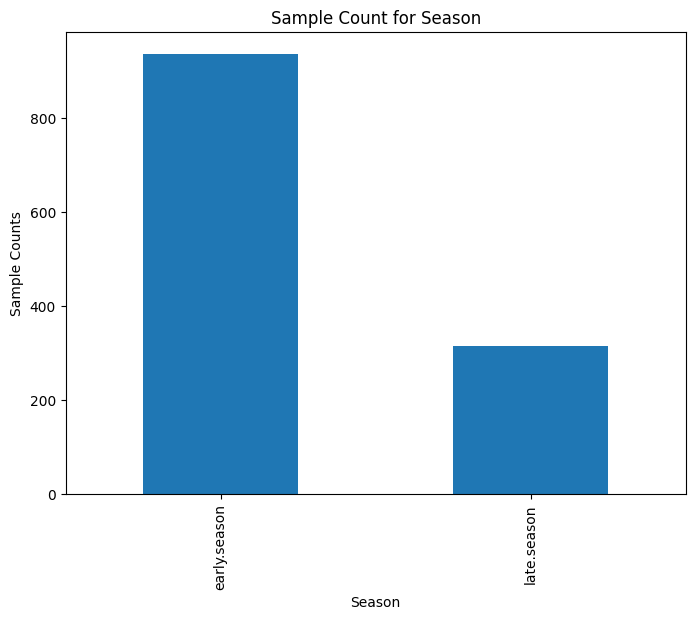

In [69]:
#Plot the count of samples in diferents Seasons

season_counts.plot(kind="bar",figsize=(8, 6))
plt.title("Sample Count for Season")
plt.xlabel("Season")
plt.ylabel("Sample Counts")
plt.show()

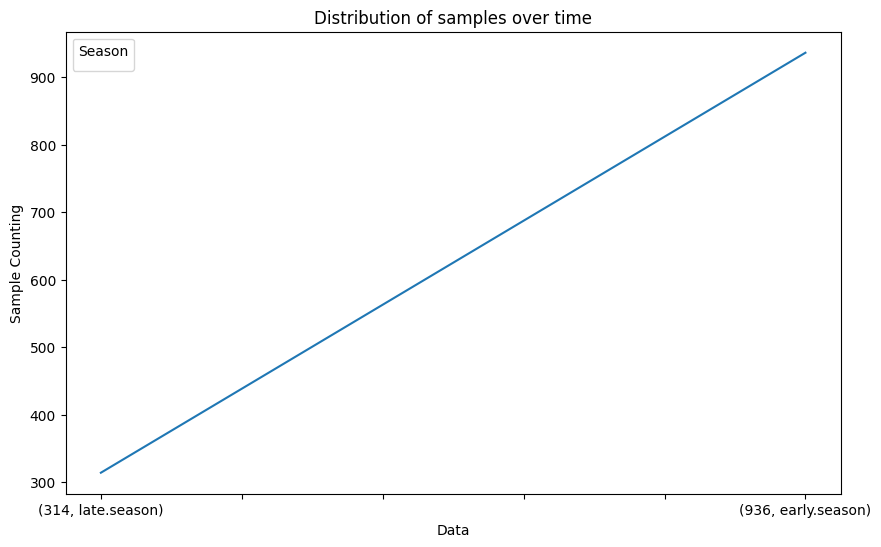

In [70]:
#Plot a line Graph for the samples distribution over time

season_distribution.unstack().plot(kind="line", figsize=(10,6))
plt.title("Distribution of samples over time")
plt.xlabel("Data")
plt.ylabel("Sample Counting")
plt.legend(title="Season", loc="upper left")
plt.show()

**2. Analyzing seasonality**

In [71]:
#Evaluate the samples distributions in different "seasons" and understand whether there are seasonal variations in the presence of bee species

#Filter the relevant columns for analyse

data_subset = data[["season","bee_species"]]

In [72]:
# Group the number of samples by "season" and "bee_species"

grouped_data = data_subset.groupby(["season", "bee_species"]).size().unstack()

In [73]:
#Calculate the proportion of each bee species per season

proportions = grouped_data.div(grouped_data.sum(axis=1),axis=0)

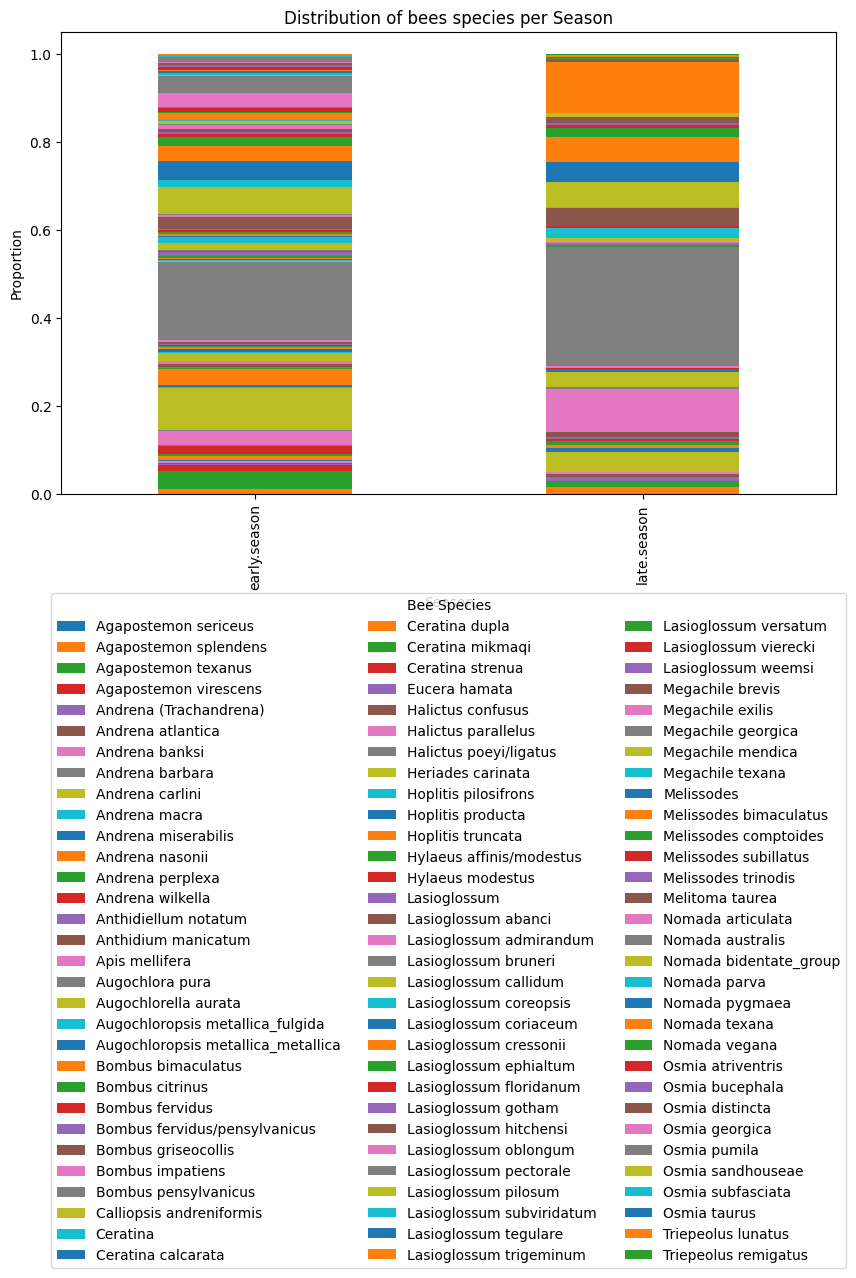

In [74]:
#Plot stacked bar chart of bee species proportions by "season" 

proportions.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Distribution of bees species per Season")
plt.xlabel("Season")
plt.ylabel("Proportion")
plt.legend(title="Bee Species", loc = "upper center", bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.show()

**Follow the answers to the challenge questions**

In [75]:
#Analyze plants preferred by native vs non-native bee species

preferred_plants = data.groupby(["native_or_non", "bee_species"])["plant_species"].value_counts().unstack()

#Visualize the distribution of bees species and plants in one sample

sample=data.sample(n=1) #Selects a randle sample
sample_species = sample["bee_species"].values[0]
sample_plants = sample["plant_species"].values[0]

print("Distribution of bee species and plants in a sample: ")
print("Bee Species: ", sample_species)
print("PLants: ", sample_plants)

Distribution of bee species and plants in a sample: 
Bee Species:  Agapostemon splendens
PLants:  Asclepias tuberosa


In [76]:
# Select the top three plant species recommended to support native bees

top_plants = data[data["native_or_non"] == "native"].groupby("plant_species").size().nlargest(4)
print("\nThree main plant species recommended for native bees:")
print(top_plants)



Three main plant species recommended for native bees:
plant_species
None                        442
Rudbeckia hirta              59
Chamaecrista fasciculata     23
Helenium flexuosum           19
dtype: int64


As the word "none" appeared first, I decided to list the first 4 plants